# 強化学習 3日目 @ Summer School 数理物理 2021

## Tsitsiklis and B. Van Roy (1996) の反例
- 関数近似RLが発散し得る例題
***
Tetsuro Morimura , 2021

### Import required Python packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import copy

In [2]:
"""Tsitsiklis & Van Roy counterexample. 
Gradient of the cost function & the learning algorithm"""

def gradient(w_grad, w, gamma):
    return 10 * (w_grad - 6/5 * gamma * w)

def learning(N_iteration, w, gamma, epsilon, alpha):
    w_list = []
    w_iter = copy.copy(w)
    for _ in range(N_iteration):
        w_before = 0
    
        #update parameter w using gradient descent
        while True:
            w_after = w_before -  alpha * gradient(w_before, w_iter, gamma)
            if abs(w_after - w_before) < epsilon:
                break
            w_before = copy.copy(w_after)
        w_iter = copy.copy(w_after)
        w_list.append(w_iter)
    
    return w_list

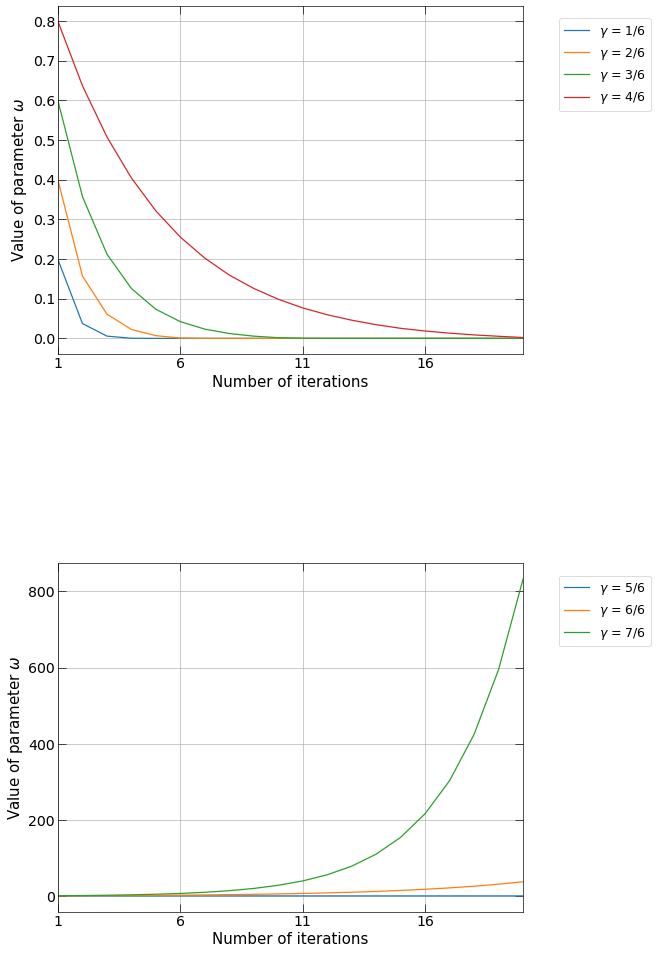

In [3]:
## visualize results
N_iteration = 20
w = 1.0

gamma_converge = [1/6, 2/6, 3/6, 4/6]
gamma_diverge = [5/6, 1, 7/6]

epsilon = 0.001
alpha = 0.03

iteration = np.linspace(1,N_iteration,N_iteration)

fig = plt.figure(dpi = 60, figsize = (10,20))
plt.subplots_adjust(hspace=0.6)


ax1 = fig.add_subplot(2,1,1)
ax1.set_xlabel('Number of iterations', fontsize = 18)
ax1.set_ylabel('Value of parameter $\omega$', fontsize = 18)
ax1.set_xlim(1,N_iteration)
ax1.set_xticks(np.arange(1, N_iteration+1, 5))
ax1.tick_params(top=True, right=True, direction = 'in', length = 10,labelsize = 17)
ax1.grid(which='both')

ax2 = fig.add_subplot(2,1,2)
ax2.set_xlabel('Number of iterations', fontsize = 18)
ax2.set_ylabel('Value of parameter $\omega$', fontsize = 18)
ax2.set_xlim(1,N_iteration)
ax2.set_xticks(np.arange(1, N_iteration+1, 5))
ax2.tick_params(top=True, right=True, direction = 'in',length = 10, labelsize = 17)
ax2.grid(which='both')

count = 1
for gamma in gamma_converge:
    w_list_1 = learning(N_iteration, w, float(gamma), epsilon, alpha)
    ax1.plot(iteration,w_list_1, label = '$\gamma$ = {}'.format(str(count) + '/6'))
    count += 1
    
count = 5
for gamma in gamma_diverge:
    w_list_2 = learning(N_iteration, w, float(gamma), epsilon, alpha)
    ax2.plot(iteration,w_list_2, label = '$\gamma$ = {}'.format(str(count) + '/6'))
    count += 1
    
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1, fontsize=15)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1, fontsize=15)